# 이미지 데이터 셋을 이용한 CNN Modeling

> ## Google Drive Mount

## Dogs and Cats Image_Data

- Train_Data : 2000(1000_Dogs, 1000_Cats)
- Valid_Data : 1000(500_Dogs, 500_Cats)
- Test_Data : 1000(500_Dogs, 500_Cats)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Import Tensorflow

- import TensorFlow

In [ ]:
import tensorflow as tf

tf.__version__

'2.12.0'

# I. Google Drive Mount

  - 'dogs_and_cats_small.zip' 파일 다운로드

    - https://drive.google.com/file/d/11afb-PJul1Qs7PqjAlXybMHKPRf_RD0l/view?usp=sharing

In [8]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   - Make 'datasets' Directory

    - 'dogs_and_cats_small.zip' 파일을 생성 후 구글 드라이브 디렉토리에 업로드

In [9]:
!mkdir -p '/content/drive/My Drive/Colab Notebooks/datasets'

- 마운트 및 파일 업로드 결과 확인

In [10]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Apr  4 04:07 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


# II. Data Preprocessing

> ## 1) Unzip 'dogs_and_cats_small.zip'

In [11]:
!unzip -q /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

In [13]:
!ls -l

total 20
drwx------ 5 root root 4096 Apr  4 04:09 drive
drwxr-xr-x 1 root root 4096 Mar 31 13:36 sample_data
drwxr-xr-x 4 root root 4096 Apr  4 04:13 test
drwxr-xr-x 4 root root 4096 Apr  4 04:13 train
drwxr-xr-x 4 root root 4096 Apr  4 04:13 validation


> ## 2) Image_File Directory Setting

- train_dir
- valid_dir
- test_dir

In [17]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

> ## 3) ImageDataGenerator( ) & flow_from_directory( )

- Normalization
  - ImageDataGenerator( )
- Resizing & Generator
  - flow_from_directory( )

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


> ## 4) Test train_generator

In [19]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기 :', data_batch.shape)
    print('배치 레이블 크기 :', labels_batch.shape)
    break

배치 데이터 크기 : (20, 150, 150, 3)
배치 레이블 크기 : (20,)


In [20]:
labels_batch

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1.], dtype=float32)

# III. CNN Keras Modeling

> ## 1) Model Define

- Feature Extraction & Classification

In [22]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

> ## 2) Model Compile

- 모델 학습방법 설정

In [24]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

- 모델 학습 수행
  - 약 11분

In [26]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 60,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/60
100/100 [==============================] - 24s 116ms/step - loss: 0.7019 - accuracy: 0.4930 - val_loss: 0.6920 - val_accuracy: 0.5990
Epoch 2/60
100/100 [==============================] - 14s 143ms/step - loss: 0.6927 - accuracy: 0.5180 - val_loss: 0.6801 - val_accuracy: 0.5020
Epoch 3/60
100/100 [==============================] - 14s 136ms/step - loss: 0.6822 - accuracy: 0.5550 - val_loss: 0.6511 - val_accuracy: 0.6170
Epoch 4/60
100/100 [==============================] - 15s 146ms/step - loss: 0.6605 - accuracy: 0.5980 - val_loss: 0.6382 - val_accuracy: 0.6270
Epoch 5/60
100/100 [==============================] - 27s 275ms/step - loss: 0.6178 - accuracy: 0.6655 - val_loss: 0.6232 - val_accuracy: 0.6600
Epoch 6/60
100/100 [==============================] - 16s 162ms/step - loss: 0.5849 - accuracy: 0.6800 - val_loss: 0.6634 - val_accuracy: 0.6300
Epoch 7/60
100/100 [==============================] - 14s 141ms/step - loss: 0.5445 - accuracy: 0.7240 - val_loss: 0.6330 - val_ac

> ## 4) 학습 결과 시각화

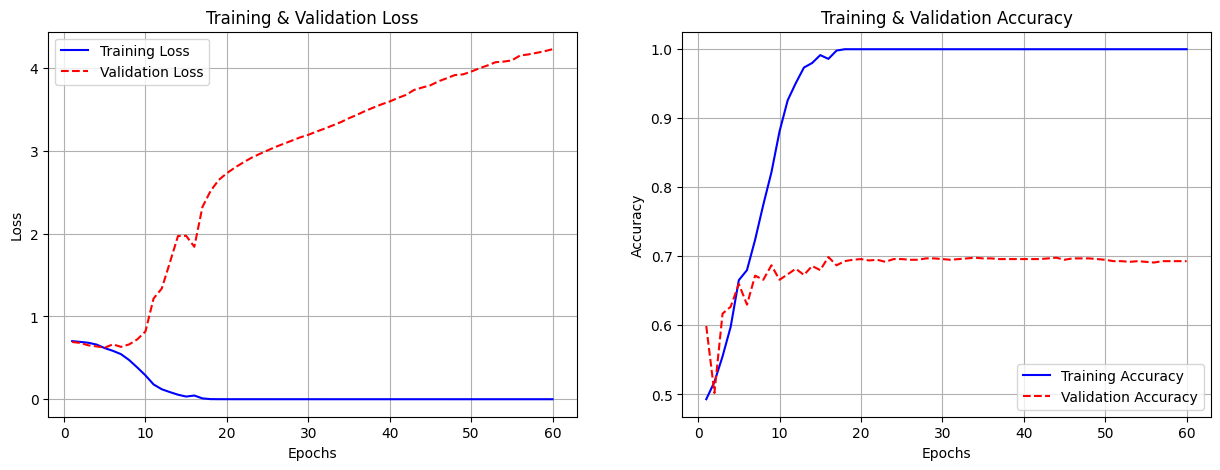

In [27]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_dandc.history['loss'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_dandc.history['accuracy'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

- test_generator

In [28]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size = (150, 150),
                batch_size = 20,
                class_mode = 'binary')

Found 1000 images belonging to 2 classes.


- Loss & Accuracy

In [29]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50,
                                verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 4.08281
Accuracy = 0.67700


# IV. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

- Mount Google Drive

In [30]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Make 'models' Directory

In [31]:
!mkdir -p '/content/drive/My Drive/Colab Notebooks/models'

> ## 2) Model Save

In [32]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [33]:
!ls -l /content/drive/my\ Drive/Colab\ Notebooks/models

ls: cannot access '/content/drive/my Drive/Colab Notebooks/models': No such file or directory


> ## 3) Model Load

In [34]:
from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [36]:
loss, accuracy = model_small.evaluate(test_generator,
                                      steps = 50,
                                      verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 4.08281
Accuracy = 0.67700
